<a href="https://colab.research.google.com/github/StellarDivaPremi/Fake-news-Project/blob/main/Premfakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
%pip install streamlit
%pip install Pillow
%pip install pandas
%pip install numpy
%pip install plotly
%pip install seaborn






Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [17]:
%pip install nltk
%pip install scikit-learn
%pip install tensorflow
%pip install pandas numpy scikit-learn tensorflow matplotlib seaborn transformers
%pip install transformers
%pip install tf-keras




Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [18]:
import streamlit as st
from PIL import Image
import pandas as pd
import numpy as np
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import os


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


import transformers.models.bert.modeling_tf_bert


In [19]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [20]:
# Download NLTK resources only once
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLTK tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\premi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\premi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\premi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
#from google.colab import drive
#drive.mount('/content/drive')



# Read CSV File

data_path = r"C:\Users\premi\Desktop\Premila\projects\Fake\WELFake_Dataset.csv"
data = pd.read_csv(data_path)
TF_ENABLE_ONEDNN_OPTS=0

In [9]:
def preprocess_text(text):
    """Preprocesses input text by converting to lowercase, removing punctuation, 
    numbers, and stopwords, and applying lemmatization."""
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text

In [22]:
def load_and_preprocess_data(data_path):
    data = pd.read_csv(data_path)
    data['content'] = data['title'].fillna('') + " " + data['text'].fillna('')
    data['content'] = data['content'].apply(preprocess_text)
    return data

In [25]:
# Initialize dictionary to store performance metrics
performance_metrics = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': []
}

# Function to update performance metrics
def update_performance_metrics(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    performance_metrics['Model'].append(model_name)
    performance_metrics['Accuracy'].append(accuracy)
    performance_metrics['F1 Score'].append(f1)


In [26]:
# Function to plot confusion matrix
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix for {title}')
    plt.show(fig)

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7089
           1       0.95      0.95      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



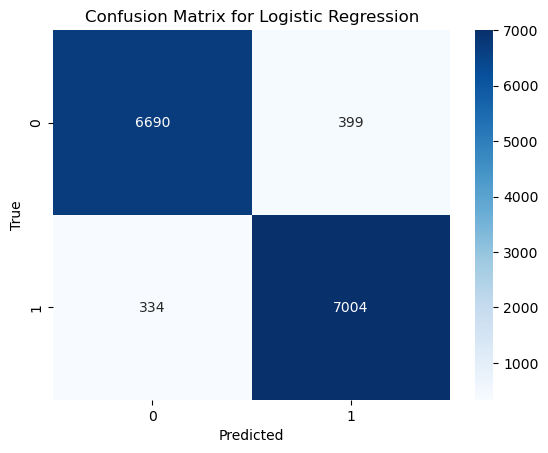

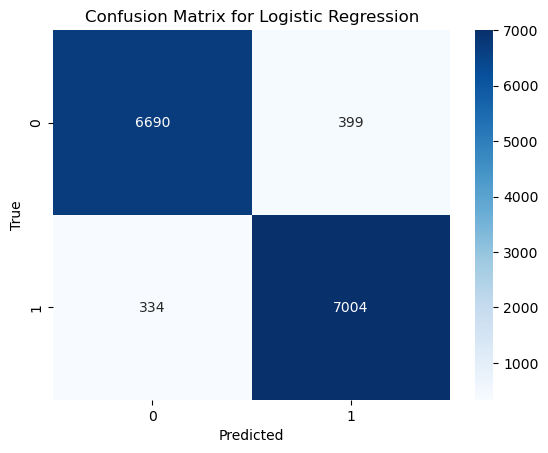

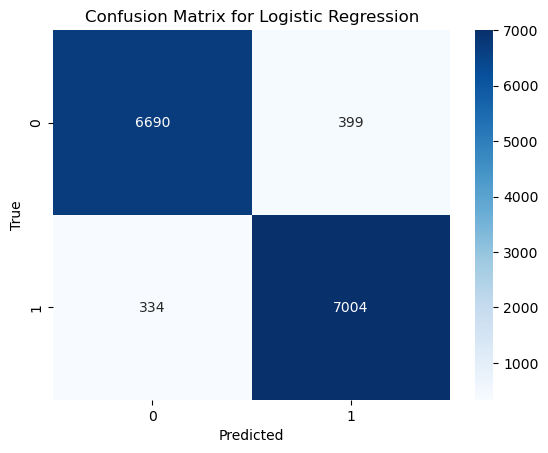

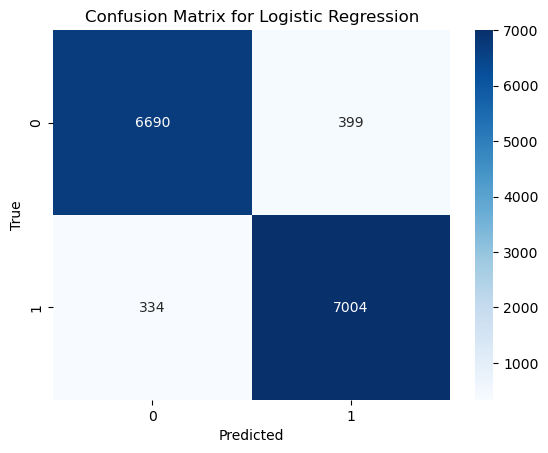

In [27]:
# Logistic Regression Model

data = load_and_preprocess_data(data_path)
X = data['content']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()
    
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, 'Logistic Regression')
    
plt.show()
    
update_performance_metrics('Logistic Regression', y_test, y_pred)


Support vector Machine

The Support Vector Classifier (SVC) is a type of Support Vector Machine (SVM) used for classification tasks. It works by finding the optimal hyperplane that separates data points of different classes in a high-dimensional space. The goal of SVC is to maximize the margin (distance) between data points of different classes, ensuring better generalization to unseen data.

The line model = SVC(kernel='linear') initializes a Support Vector Classifier (SVC) model with a linear kernel. Let's go over what this line does and how it fits into the overall process:

Explanation of SVC(kernel='linear')
SVC: This is the Support Vector Classifier from sklearn.svm. It is used for classification tasks, such as distinguishing between fake and real news in your project.

Regularization Parameter (C=1.0):

Controls the trade-off between achieving a low training error and a low testing error, which is equivalent to avoiding overfitting. A smaller C creates a smoother decision boundary, while a larger C aims to classify all training points correctly, potentially at the cost of overfitting.


Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7089
           1       0.95      0.96      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



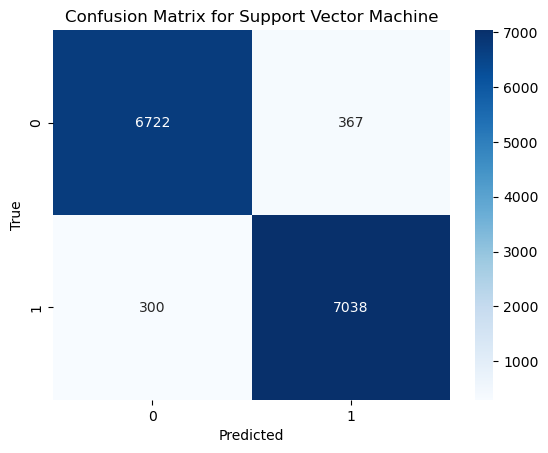

In [28]:
# Support Vector Machine Function

data = load_and_preprocess_data(data_path)
X = data['content']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, 'Support Vector Machine')
plt.show()

update_performance_metrics('Support Vector Machine', y_test, y_pred)


The neural network model will process the text data using an LSTM architecture to capture long-term dependencies in the text. The network will take sequences of words (converted to numerical format) as input, and output the probability of each class (fake or real news).

Key Components of the Neural Network Model
Text Preprocessing:

Text data is first tokenized using the Tokenizer from Keras to convert text to sequences of integers.
The sequences are then padded to ensure they all have the same length (maxlen).
Model Architecture:

Embedding Layer: The first layer is an embedding layer that converts input text sequences into dense vectors of fixed size (128 in this case). This layer helps the model learn a distributed representation of words.

LSTM Layers:
The first LSTM layer has 128 units and returns sequences, allowing the next LSTM layer to process the output.
The second LSTM layer has 64 units. LSTMs are good at capturing dependencies in sequences and are ideal for text classification tasks.
Dropout Layer: Helps prevent overfitting by randomly dropping neurons during training.
Dense Output Layer: A single neuron with a sigmoid activation function to output the probability of the input belonging to the fake news class.
Model Compilation:

Optimizer: Adam optimizer with a learning rate of 0.001, which adapts the learning rate during training for better convergence.
Loss Function: Binary cross-entropy, suitable for binary classification problems.
Early Stopping:

A callback to stop training if the validation loss does not improve for three consecutive epochs. This prevents overfitting and saves computation time.

Epoch 1/2
902/902 ━━━━━━━━━━━━━━━━━━━━ 643s 702ms/step - accuracy: 0.8822 - loss: 0.2750 - val_accuracy: 0.9452 - val_loss: 0.1471
Epoch 2/2
902/902 ━━━━━━━━━━━━━━━━━━━━ 623s 691ms/step - accuracy: 0.9545 - loss: 0.1265 - val_accuracy: 0.9611 - val_loss: 0.1012
451/451 ━━━━━━━━━━━━━━━━━━━━ 38s 84ms/step
Neural Network - LSTM Model Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7089
           1       0.97      0.95      0.96      7338

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



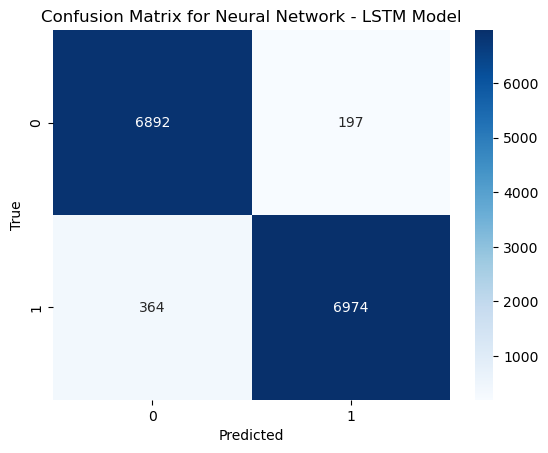

In [29]:
# Neural Network (LSTM) Function

data = load_and_preprocess_data(data_path)
X = data['content']
y = data['label']

max_features = 25000
maxlen = 300
tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=maxlen)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
        Embedding(input_dim=max_features, output_dim=128),
        LSTM(128, return_sequences=True),
        Dropout(0.2),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])

# Define your model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train, y_train, epochs=2, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

y_pred = (model.predict(X_val) > 0.5).astype("int32")
print('Neural Network - LSTM Model Evaluation:')
print(classification_report(y_val, y_pred))
plot_confusion_matrix(y_val, y_pred, 'Neural Network - LSTM Model')
plt.show()  
update_performance_metrics('Neural Network - LSTM Model', y_val, y_pred)


Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7089
           1       0.95      0.97      0.96      7338

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



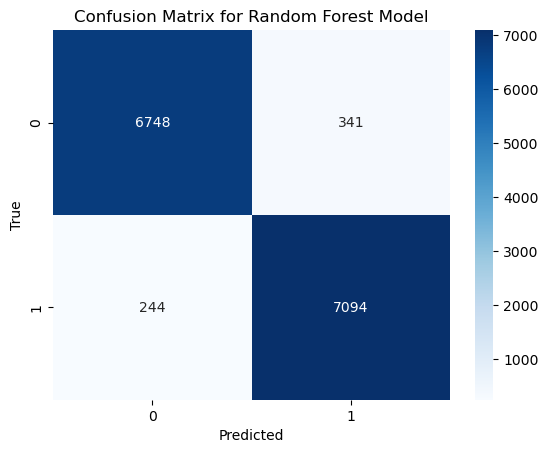

In [28]:
# Random Forest Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load and preprocess your data
data = load_and_preprocess_data(data_path)
X = data['content']
y = data['label']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, 'Random Forest Model')
plt.show()

update_performance_metrics('Random Forest Model', y_test, y_pred)



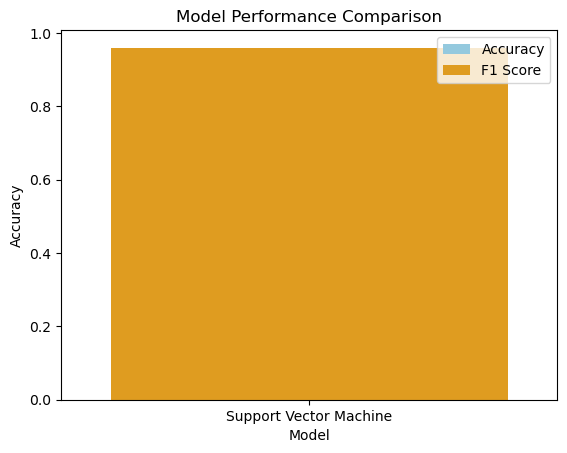

In [32]:
# Function to visualize performance metrics
#def visualize_performance():
df_metrics = pd.DataFrame(performance_metrics)
fig, ax = plt.subplots()
    
sns.barplot(x='Model', y='Accuracy', data=df_metrics, ax=ax, color='skyblue', label='Accuracy')
sns.barplot(x='Model', y='F1 Score', data=df_metrics, ax=ax, color='orange', label='F1 Score')
    
ax.set_title('Model Performance Comparison')
ax.legend()
plt.show()
